# Relatório EP1 - Programação Concorrente e Paralela

**Alunos**: 
- Erick Rodrigues de Santana, NUSP: 11222008
- Francisco Eugênio Wernke, NUSP: 11221870
- Thiago Guerrero Balera, NUSP: 11275297
- Vinicius Pereira Ximenes Frota, NUSP: 11221967

**Professor**: Alfredo Goldman

**Monitores**: Elisa Silva e Luciana Marques

O relatório a seguir foi elaborado com base nas instruções do EP1 da Matéria MAC0219 - Programação Concorrente e Paralela.

## Executando o programa
Para executar o programa *mandelbrot* nas versões paralelizáveis (OpenMP e Pthreads), adicionamos um argumento extra para definir o número de threads a serem criadas. Execute com o seguinte formato:
```bash
./mandelbrot_pth c_x_min c_x_max c_y_min c_y_max image_size num_threads
./mandelbrot_omp c_x_min c_x_max c_y_min c_y_max image_size num_threads
```

## Observações

    Todos as execuções do programa foram feitas na Rede Linux usando 20 medições para cada tipo de execução.

In [1]:
# Bibliotecas importadas
using CSV
using DataFrames
using Plots, Measures

# Leitura de dados CSV
csv = CSV.read("../measurements/data.csv", DataFrame)
print(csv)

10400×6 DataFrame
   Row │ tipo    tamanho  threads  tempo           io         figura             
       │ String  Int64    Int64    Float64         Float64    String             
───────┼─────────────────────────────────────────────────────────────────────────
     1 │ seq          16        1       0.15378      47.6012  full
     2 │ seq          16        1       0.172377     53.2033  full
     3 │ seq          16        1       0.174761     53.1785  full
     4 │ seq          16        1       0.174284     53.1797  full
     5 │ seq          16        1       0.130892    156.469   full
     6 │ seq          16        1       0.151873    412.237   full
     7 │ seq          16        1       0.152588    612.824   full
     8 │ seq          16        1       0.153303     50.5521  full
     9 │ seq          16        1       0.152349     53.2384  full
    10 │ seq          16        1       0.152826     53.2939  full
    11 │ seq          16        1       0.153542    139.28    full

  1685 │ pth          32        2      53.273         0.0     full
  1686 │ pth          32        2     299.309         0.0     full
  1687 │ pth          32        2     555.655         0.0     full
  1688 │ pth          32        2     135.521         0.0     full
  1689 │ pth          32        2      53.2513        0.0     full
  1690 │ pth          32        2      53.9012        0.0     full
  1691 │ pth          32        2      53.3969        0.0     full
  1692 │ pth          32        2      53.3338        0.0     full
  1693 │ pth          32        2      53.3059        0.0     full
  1694 │ pth          32        2      53.2384        0.0     full
  1695 │ pth          32        2      53.298         0.0     full
  1696 │ pth          32        2      53.1955        0.0     full
  1697 │ pth          32        2      53.165         0.0     full
  1698 │ pth          32        2     135.641         0.0     full
  1699 │ pth          32        2      53.1957        0.0     

  2532 │ pth          32        4      53.4401        0.0     elephantValley
  2533 │ pth          32        4      53.4303        0.0     elephantValley
  2534 │ pth          32        4      53.4885        0.0     elephantValley
  2535 │ pth          32        4      53.4134        0.0     elephantValley
  2536 │ pth          32        4      53.436         0.0     elephantValley
  2537 │ pth          32        4      53.4298        0.0     elephantValley
  2538 │ pth          32        4      53.3905        0.0     elephantValley
  2539 │ pth          32        4      53.3452        0.0     elephantValley
  2540 │ pth          32        4      53.4554        0.0     elephantValley
  2541 │ pth          32        4      62.3584        0.0     tripleSpiralValley
  2542 │ pth          32        4      64.553         0.0     tripleSpiralValley
  2543 │ pth          32        4      53.3941        0.0     tripleSpiralValley
  2544 │ pth          32        4      53.3729        0.0     tr

  3378 │ pth          64        8      53.5414        0.0     full
  3379 │ pth          64        8      53.5266        0.0     full
  3380 │ pth          64        8     689.826         0.0     full
  3381 │ pth          64        8     233.01          0.0     seahorseValley
  3382 │ pth          64        8     131.16          0.0     seahorseValley
  3383 │ pth          64        8     159.463         0.0     seahorseValley
  3384 │ pth          64        8      53.4537        0.0     seahorseValley
  3385 │ pth          64        8      64.5726        0.0     seahorseValley
  3386 │ pth          64        8      53.5417        0.0     seahorseValley
  3387 │ pth          64        8      53.488         0.0     seahorseValley
  3388 │ pth          64        8      53.5097        0.0     seahorseValley
  3389 │ pth          64        8     153.506         0.0     seahorseValley
  3390 │ pth          64        8      64.5411        0.0     seahorseValley
  3391 │ pth          64     

  4223 │ pth          64       16      53.8509        0.0     tripleSpiralValley
  4224 │ pth          64       16     147.743         0.0     tripleSpiralValley
  4225 │ pth          64       16      55.7222        0.0     tripleSpiralValley
  4226 │ pth          64       16      53.4799        0.0     tripleSpiralValley
  4227 │ pth          64       16      64.5838        0.0     tripleSpiralValley
  4228 │ pth          64       16      53.5049        0.0     tripleSpiralValley
  4229 │ pth          64       16      53.5748        0.0     tripleSpiralValley
  4230 │ pth          64       16      53.5266        0.0     tripleSpiralValley
  4231 │ pth          64       16      53.5717        0.0     tripleSpiralValley
  4232 │ pth          64       16      53.5288        0.0     tripleSpiralValley
  4233 │ pth          64       16      64.6083        0.0     tripleSpiralValley
  4234 │ pth          64       16      53.4053        0.0     tripleSpiralValley
  4235 │ pth          64    

  5069 │ pth         128       32     154.021         0.0     seahorseValley
  5070 │ pth         128       32      89.5188        0.0     seahorseValley
  5071 │ pth         128       32      89.4423        0.0     seahorseValley
  5072 │ pth         128       32      87.8947        0.0     seahorseValley
  5073 │ pth         128       32      87.9042        0.0     seahorseValley
  5074 │ pth         128       32      89.3173        0.0     seahorseValley
  5075 │ pth         128       32      78.1403        0.0     seahorseValley
  5076 │ pth         128       32      87.9393        0.0     seahorseValley
  5077 │ pth         128       32      87.8041        0.0     seahorseValley
  5078 │ pth         128       32      88.0902        0.0     seahorseValley
  5079 │ pth         128       32      87.8019        0.0     seahorseValley
  5080 │ pth         128       32      88.9955        0.0     seahorseValley
  5081 │ pth         128       32      74.3961        0.0     elephantValley

Excessive output truncated after 524288 bytes.

## Organização dos dados

Para agrupar os dados coletados usamos a estrutura de dados de dicionário. A estrutura pode ser entendida assim:
```json
{
    seq: {
        full: {
            Tamanho de entrada(2^4): Pair<Média, Intervalo de confiança>
            ... ,
            Tamanho de entrada(2^13): Pair<Média, Intervalo de confiança>
        },
        seahorseValley: ... ,
        elephantValley: ... ,
        tripleSpiralValley: ...
    },
    seqio: ...Igual a seq,
    pth: {
        full: {
            Tamanho de entrada(2^4): [
                2^0 threads: Pair<Média, Intervalo de confiança>,
                2^1 threads: Pair<Média, Intervalo de confiança>,
                ... ,
                2^5 threads: Pair<Média, Intervalo de confiança>
            ],
            ... ,
            Tamanho de entrada(2^13): [
                2^0 threads: Pair<Média, Intervalo de confiança>,
                2^1 threads: Pair<Média, Intervalo de confiança>,
                ... ,
                2^5 threads: Pair<Média, Intervalo de confiança>
            ]
        },
        seahorseValley: ... ,
        elephantValley: ... ,
        tripleSpiralValley: ...
    },
    omp: ...Igual a pthread
}
```
Onde *seqio* representa o tempo total e *seq* representa o tempo sem as operações de I/O e gerenciamento de memória da versão sequencial.

Como o intervalo de confiança é simétrico em torno da média, só armazenamos os limiares.

In [2]:
data = Dict();
data["seq"] = Dict("full"=>Dict(), "seahorseValley"=>Dict(), "elephantValley"=>Dict(), "tripleSpiralValley"=>Dict());
data["seqio"] = Dict("full"=>Dict(), "seahorseValley"=>Dict(), "elephantValley"=>Dict(), "tripleSpiralValley"=>Dict());
data["pth"] = Dict("full"=>Dict(), "seahorseValley"=>Dict(), "elephantValley"=>Dict(), "tripleSpiralValley"=>Dict());
data["omp"] = Dict("full"=>Dict(), "seahorseValley"=>Dict(), "elephantValley"=>Dict(), "tripleSpiralValley"=>Dict());

keys = ["full", "seahorseValley", "elephantValley", "tripleSpiralValley"];
for i in 4:13
     for t in keys
         pair = 1 => 0;
         data["seq"][t][2^i] = pair;
         data["seqio"][t][2^i] = pair;
         data["pth"][t][2^i] = Pair{Float64, Float64}[];
         data["omp"][t][2^i] = Pair{Float64, Float64}[];
     end
end

## Intervalo de confiança

Para 95% de nível de confiança e n-1 (19) graus de liberdade, obtemos pela tabela da t-student o valor 2.0930 para z.


In [16]:
function confidence_interval(vector, mean)
    z = 2.0930;
    n = length(vector);
    sigma = 0;
    for i in 1:n
        sigma += (vector[i] - mean)^2;
    end
    sigma /= n-1;
    sigma = sqrt(sigma);
    return z * sigma/sqrt(n);
end;

In [4]:
# Processamento dos dados
size = nrow(csv)

for i in 21:20:size+1
    tipo = csv.tipo[i-1];
    figura = csv.figura[i-1];
    tamanho = csv.tamanho[i-1];
    threads = csv.threads[i-1];
    if (tipo == "seq")
        vector = vcat(csv.tempo[i-20:i-1], csv.io[i-20:i-1]);
        sum = reduce(+, vector);
        pair = sum/20 => confidence_interval(vector, sum/20);
        data["seqio"][figura][tamanho] = pair;

        sum  = reduce(+, csv.tempo[i-20:i-1]);
        pair = sum/20 => confidence_interval(csv.tempo[i-20:i-1], sum/20);
        data[tipo][figura][tamanho] = pair;
    else
        sum  = reduce(+, csv.tempo[i-20:i-1]);
        pair = sum/20 => confidence_interval(csv.tempo[i-20:i-1], sum/20);
        push!(data[tipo][figura][tamanho], pair);
    end
end

## Visualização dos resultados

Para visualizar os resultados, plotamos um gráfico para cada tipo de programa em cada tipo de imagem e, nas versões paralelizáveis, para cada número de *threads* também.

Por motivos de melhor visualização dos resultados, optamos por exibir os eixos em escala logarítimica com base 2. O eixo x representa expoentes do tamanho de entrada e o eixo y representa o log2 da média do tempo de execução em milisegundos.

In [17]:
# Definição de fontes para o plot
axis_font = Plots.font("Helvetica", 7);
text_font = Plots.font("Helvetica", 10);

In [18]:
# Definição do eixo x
x = [];
for i in 4:13
    append!(x, i);
end

In [7]:
# Coleta dos dados necessários para cada plot
function fetch_data(figura, id)
    plot_seq = [];
    ci_seq = [];
    plot_seqio = [];
    ci_seqio = [];
    plot_pth = [];
    ci_pth = [];
    plot_omp = [];
    ci_omp = [];
    for i in 4:13
        append!(plot_seq, data["seq"][figura][2^i].first);
        append!(plot_seqio, data["seqio"][figura][2^i].first);
        append!(plot_pth, data["pth"][figura][2^i][id].first);
        append!(plot_omp, data["omp"][figura][2^i][id].first);

        append!(ci_seq, data["seq"][figura][2^i].second);
        append!(ci_seqio, data["seqio"][figura][2^i].second);
        append!(ci_pth, data["pth"][figura][2^i][id].second);
        append!(ci_omp, data["omp"][figura][2^i][id].second);
    end
    
    for i in 1:length(plot_seq)
        ci_seq[i] = log2(plot_seq[i] + ci_seq[i]) - log2(plot_seq[i]);
        ci_seqio[i] = log2(plot_seqio[i] + ci_seqio[i]) - log2(plot_seqio[i]);
        ci_pth[i] = log2(plot_pth[i] + ci_pth[i]) - log2(plot_pth[i]);
        ci_omp[i] = log2(plot_omp[i] + ci_omp[i]) - log2(plot_omp[i]);
    end
    
    plot_seq = broadcast(log2, plot_seq);
    plot_seqio = broadcast(log2, plot_seqio);
    plot_pth = broadcast(log2, plot_pth);
    plot_omp = broadcast(log2, plot_omp);
    
    return plot_seq, ci_seq, plot_seqio, ci_seqio, plot_pth, ci_pth, plot_omp, ci_omp;
end;

In [73]:
# Plota os 4 gráficos de cada tipo de programa para cada imagem usando o número de threads fornecido
function plot_by_number_of_threads(threads)
    id = convert(Int64, log2(threads)) + 1;
    keys = ["full", "seahorseValley", "elephantValley", "tripleSpiralValley"];
    for figura in keys
        plot_seq, ci_seq, plot_seqio, ci_seqio, plot_pth, ci_pth, plot_omp, ci_omp = fetch_data(figura, id);
        
        title = "\n" * string(threads) * " Thread(s) - " * figura;
        
        seq = plot(x, plot_seq, label= "Seq sem I/O", lw = 1, legend=:bottomright,
            color="#7a5306", fillcolor="#f4b22e",
            seriestype = :scatter,
            ribbon = ci_seq)
        
        seqio = plot(x, plot_seqio, label= "Seq", lw = 1, legend=:bottomright,
            color="#810ee0", fillcolor="#d382ab",
            seriestype = :scatter,
            ribbon = ci_seqio)
        
         pth = plot(x,  plot_pth, label= "Pth", lw = 1, legend=:bottomright,
            color="#000396", fillcolor="#07ffc0",
            seriestype = :scatter,
            ribbon = ci_pth)
        
         omp = plot(x, plot_omp, label= "OMP", lw = 1, legend=:bottomright,
            color="#f60000", fillcolor="#29a7e1",
            seriestype = :scatter,
            ribbon = ci_omp)
        
        final_plot = plot(seq, seqio, pth, omp, size=(750, 410), layout=4,
            guidefont=axis_font, xtickfont=axis_font, ytickfont=axis_font,
            titlefont=text_font, legendfont = axis_font,
            bottom_margin = 7mm,
            xticks = [minimum(x):maximum(x)+1;],
            title=title, xlabel="Log2 do tamanho da entrada", ylabel="Log2 de tempo(ms)")
        
        display(final_plot)
    end
end;


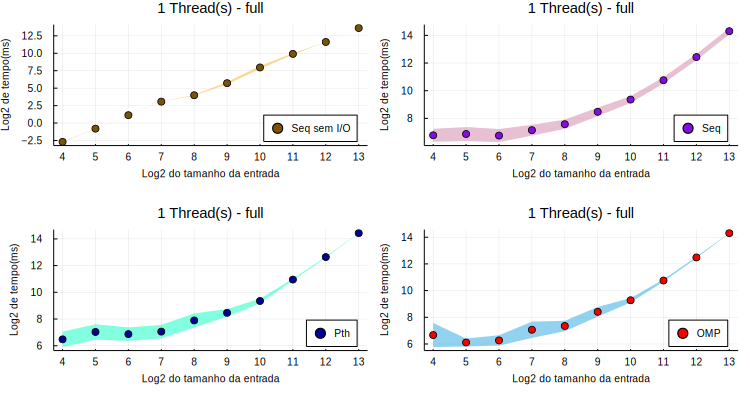

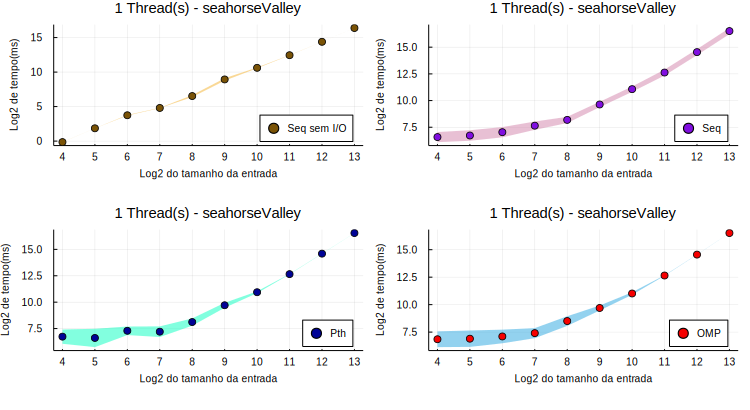

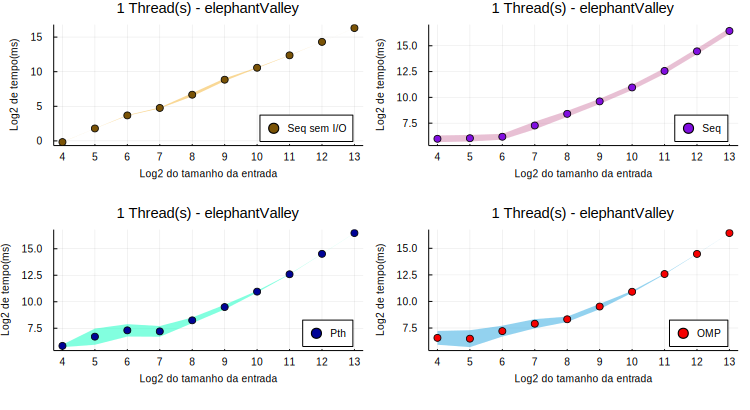

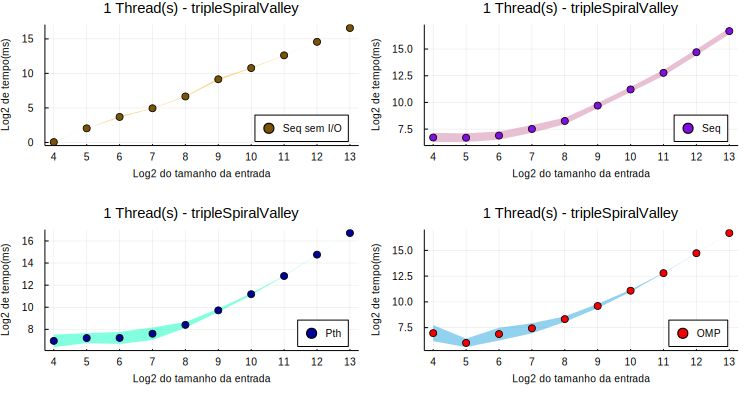

In [74]:
plot_by_number_of_threads(2^0)

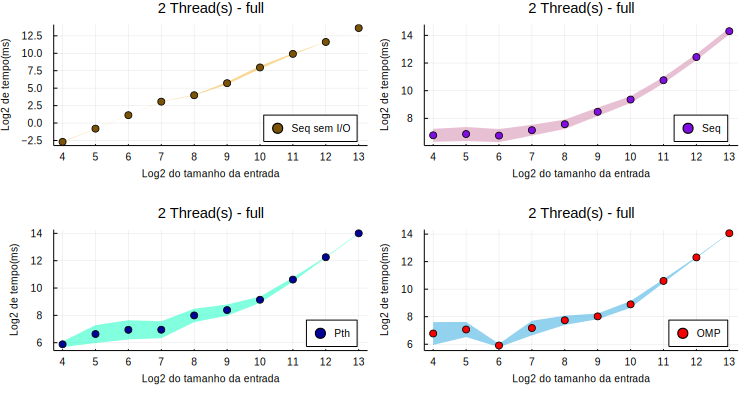

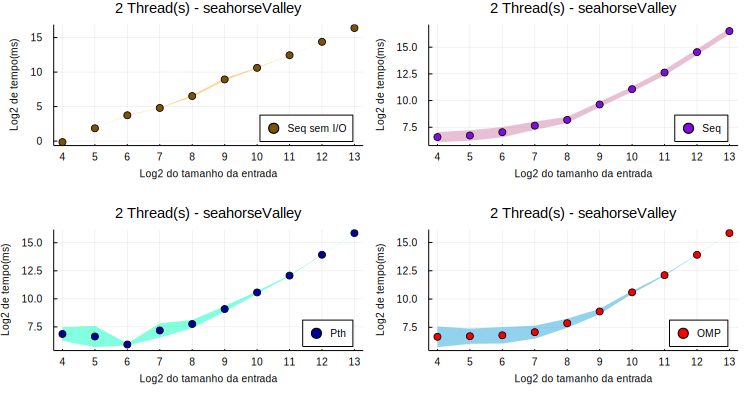

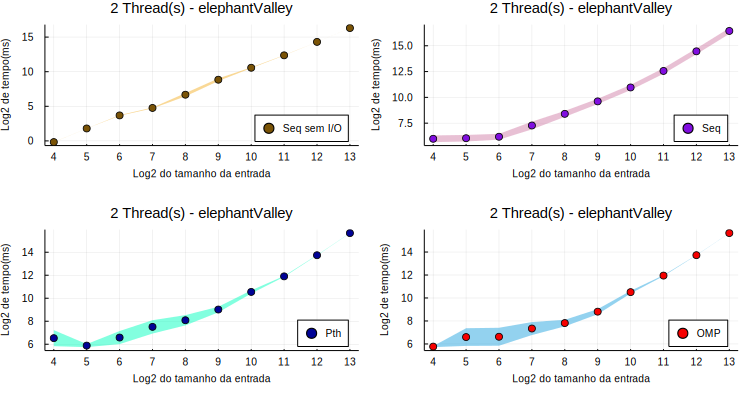

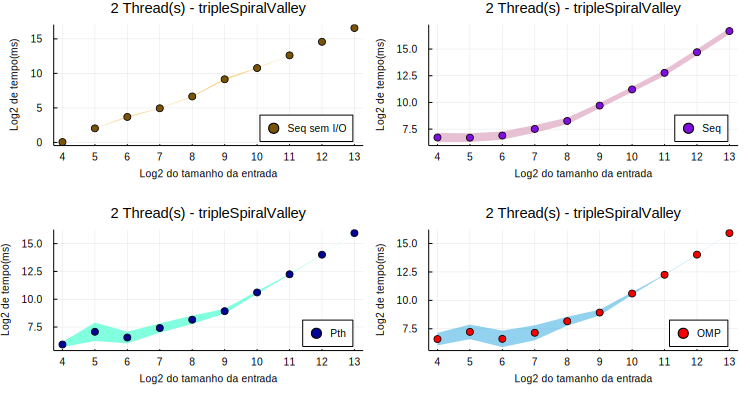

In [76]:
plot_by_number_of_threads(2^1)

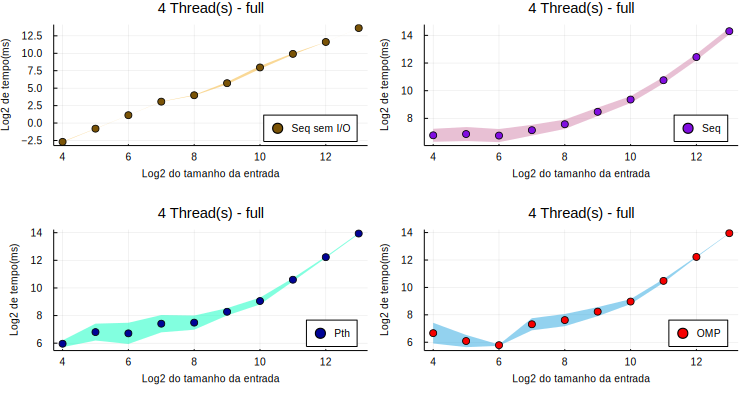

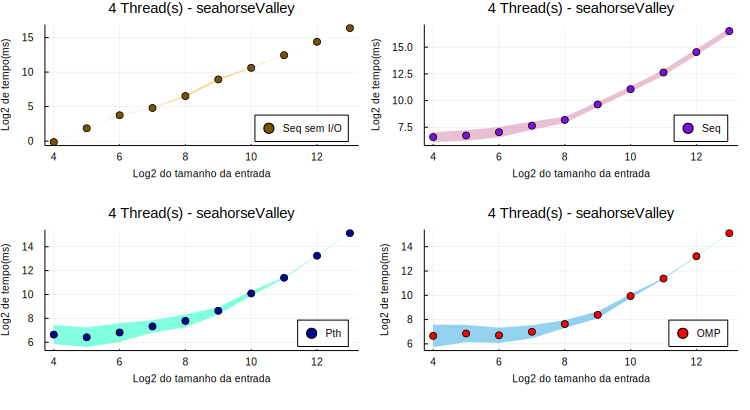

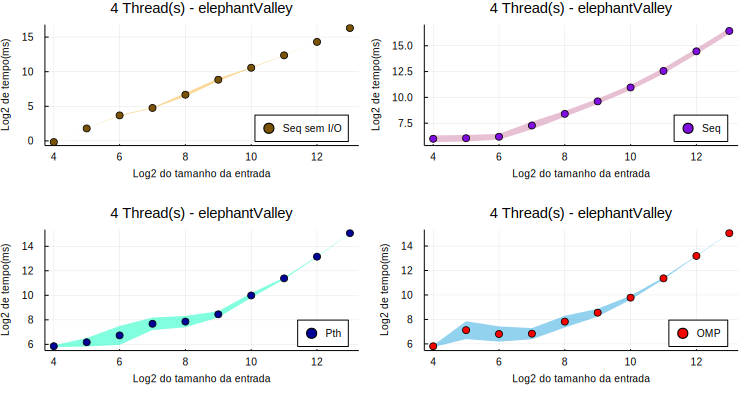

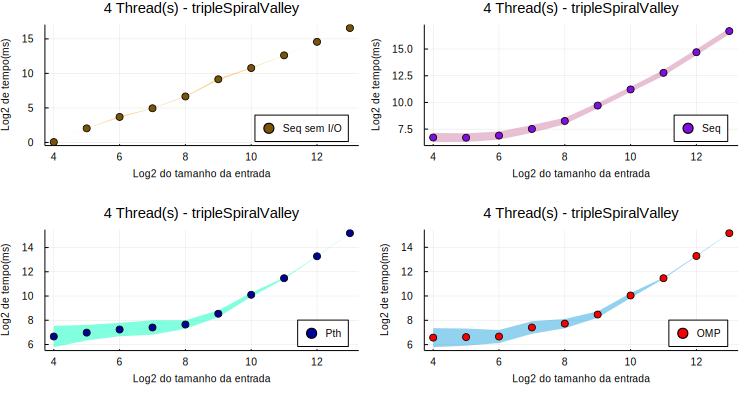

In [11]:
plot_by_number_of_threads(2^2)

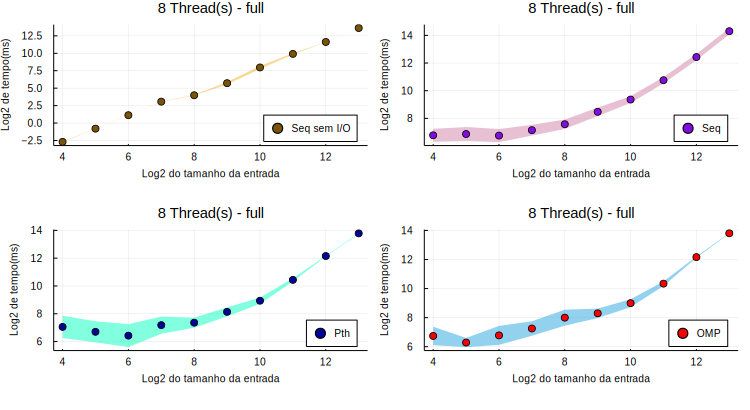

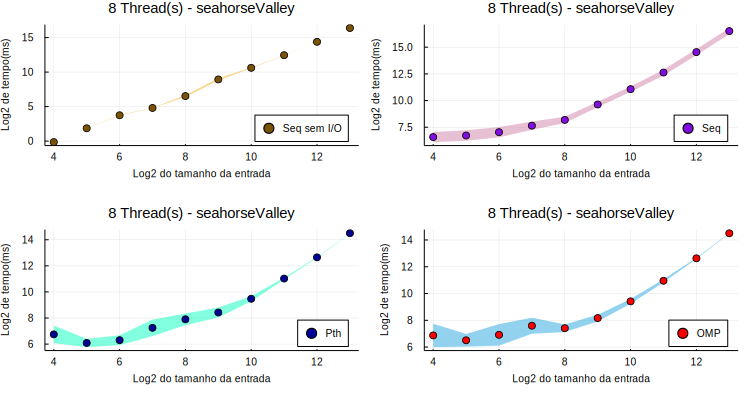

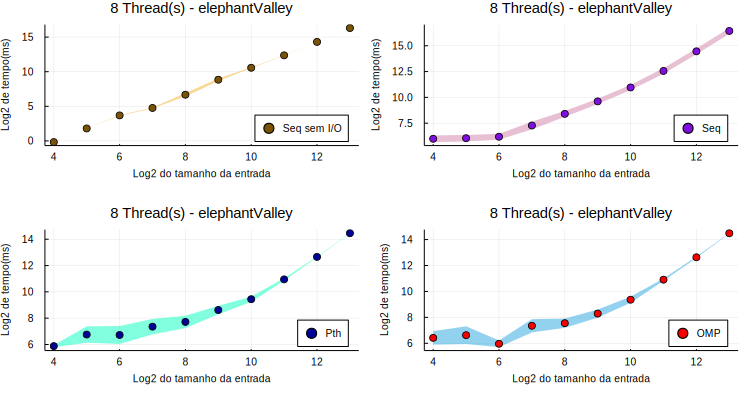

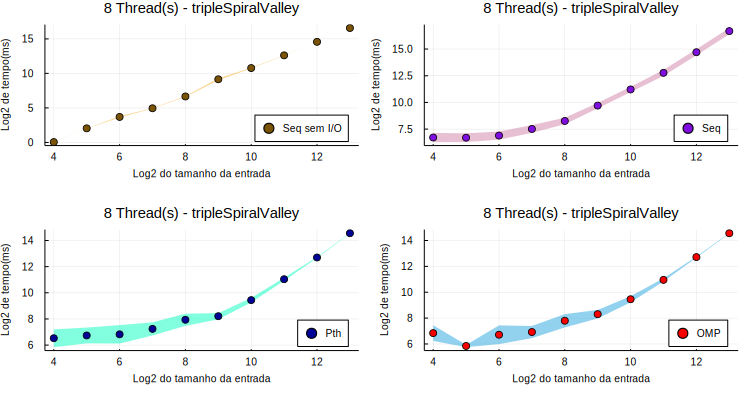

In [12]:
plot_by_number_of_threads(2^3)

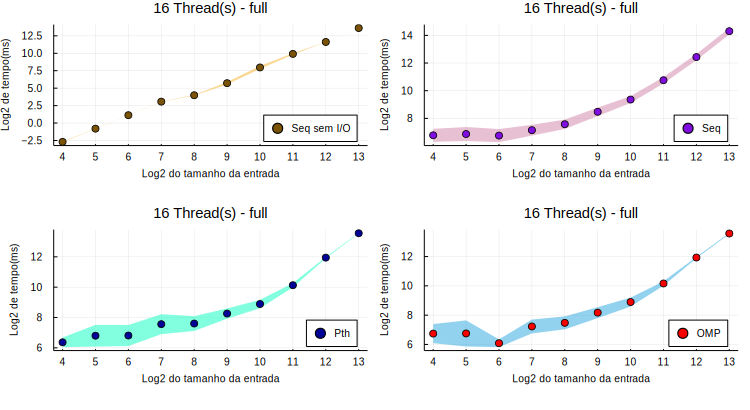

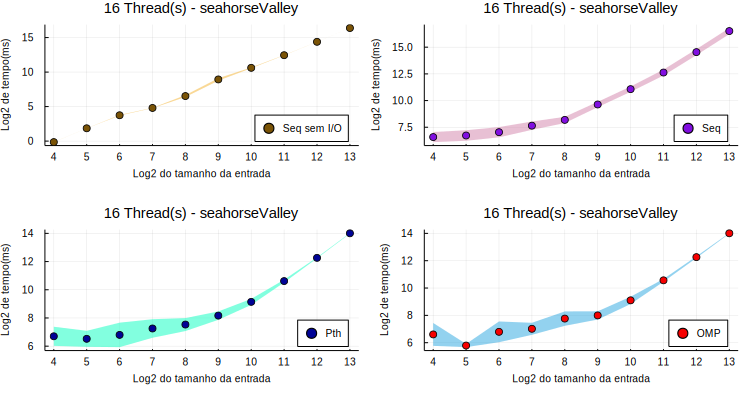

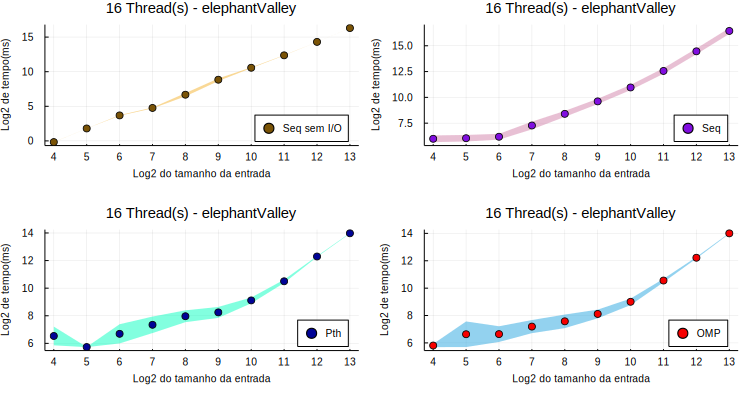

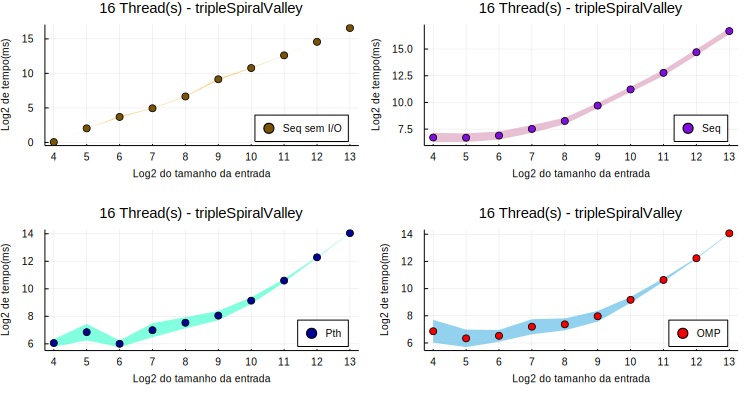

In [75]:
plot_by_number_of_threads(2^4)

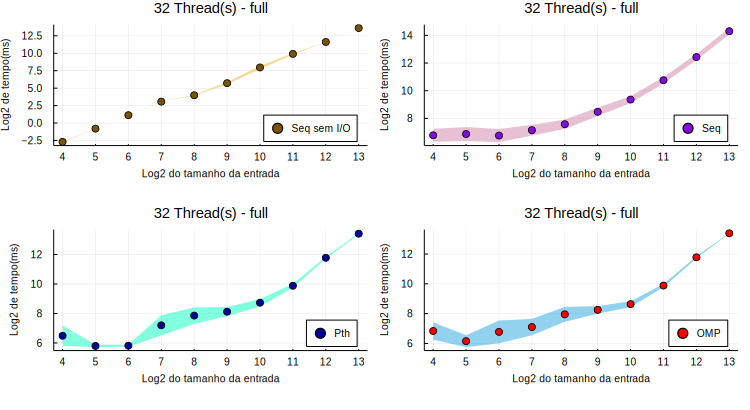

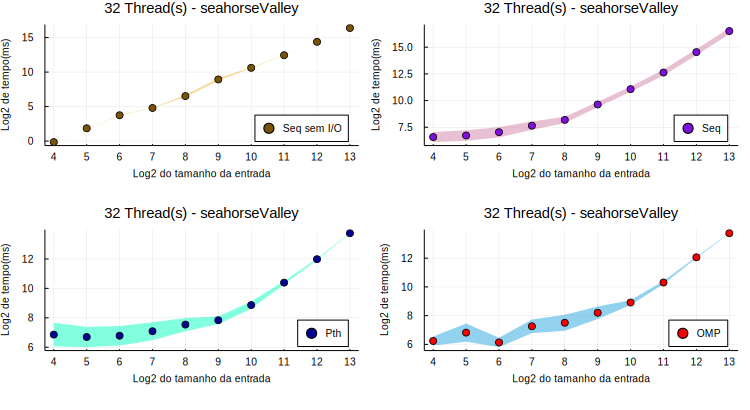

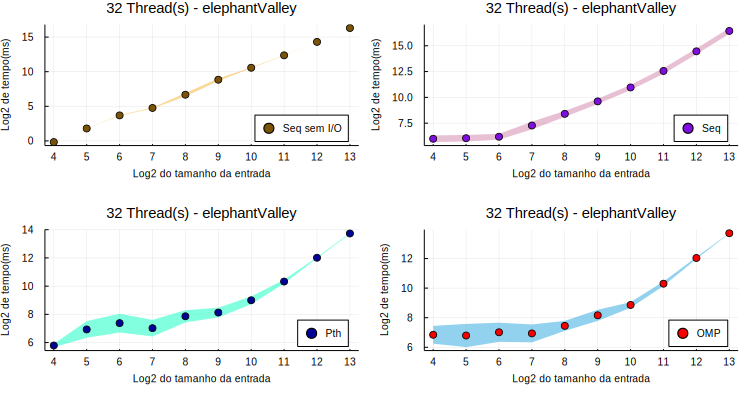

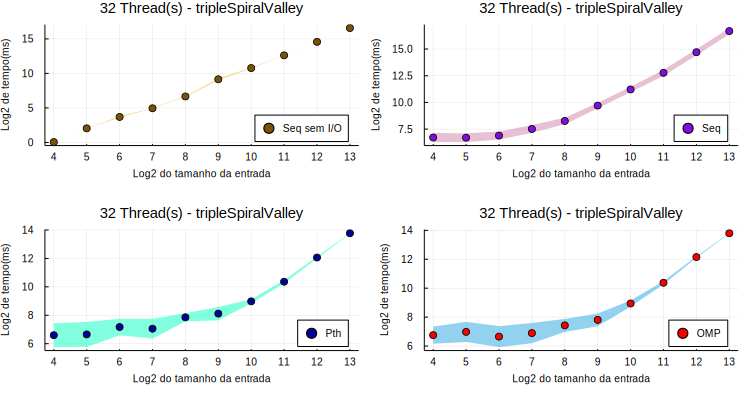

In [77]:
plot_by_number_of_threads(2^5)

## Resultados

### Como e por que as três versões do programa se comportam com a variação:


* **Do tamanho da entrada?**
    
    O tempo gasto é proporcional ao tamanho da entrada independente da versão, ou seja, podemos ver que todos os gráficos possuem o mesmo formato mesmo que possuam valores diferentes. Isto ocorre pois, independentemente de qual seja o método escolhido para fazer a computação, temos que um aumento no tamanho da entrada implica em mais trabalho que o método precisa realizar. 
        
        
* **Das regiões do Conjunto de Mandelbrot?**
    
    O tempo gasto na figura *full* é relativamente menor do que o tempo gasto nas outras figuras na versão sequencial. Nas versões paralelizáveis, essa diferença é relativa à quantidade de threads. Isso ocorre pois os pixels da figura *full* divergem de forma mais rápida do que os pixels das outras figuras em relação ao limitante *escape_radius_squared* definido, fazendo com que o programa execute menos iterações no total.

        
* **Do número de threads?**

    Conforme o número de threads aumenta, conseguimos observar, para tamanhos cada vez maiores de entrada, um fator de redução do tempo cada vez mais próximo do número de threads. Isto ocorre pois quando começamos a ter tamanhos de entrada cada vez maiores, conseguimos observar que os benefícios do uso das threads acaba superando o seu custo de criação. 
    
    Além disso, conseguimos observar que nas versões paralelizadas quanto maior o número de threads, menor é a diferença vista na segunda resposta. Isto ocorre pois existe maior probabilidade de seguirmos uma história em que os pixels que demoram muitas iterações para atingir a divergência rodem em threads diferentes, fazendo com que os blocos paralelizáveis tenham um tamanho mais parecido entre si. Assim o programa executa em menos tempo, pois a grande maioria das threads terminarão juntas.

### Qual o impacto das operações de I/O e alocação de memória no tempo de execução?

    Analisando o código, podemos perceber de forma simples que as operações de I/O e alocação de memória gastam tempo proporcional a t^2 (O(t^2)), onde t é o tamanho da entrada. Portanto, podemos notar que essa diferença é relativa na comparação entre os gráficos, principalmente para valores de entrada pequenos, pois esses valores possuem um tempo de processamento ínfimo e quase todo o tempo gasto pela execução do programa é realizando essas operações.